In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from mapie.classification import MapieClassifier
from mapie.metrics import classification_coverage_score, classification_mean_width_score
plt.style.use("seaborn") 

In [2]:
data = pd.read_csv("data/knee_features.csv")
data = data.dropna().drop_duplicates().reindex()
data["LATERALITY"] = np.where(data["LATERALITY"] == "RIGHT", 0, 1) # Use laterality as binary variables
data_x = data.drop(["KLG", "ID", "TIMEPOINT"], axis = 1)
scaler = StandardScaler()
data_x = scaler.fit_transform(data_x) # Standardizes the data on a scale of 0 to 1
data_y = data.KLG.astype(int) # Use the KLG variable as predictor

In [3]:
X_train_and_cal, X_test, y_train_and_cal, y_test = train_test_split(data_x, data_y, test_size=1/3)
X_train, X_cal, y_train, y_cal = train_test_split(X_train_and_cal, y_train_and_cal, test_size=1/3) 

__[How does MAPIE work on classification?]( https://mapie.readthedocs.io/en/latest/index.html)__



![](data/mapie.png)

### Logistic Regression

In [4]:
LogRes = LogisticRegression(penalty="l1", multi_class="ovr", class_weight="balanced", solver="liblinear").fit(X_train, y_train)
mapie = MapieClassifier(estimator=LogRes).fit(X_cal, y_cal)

In [5]:
alpha_levels = [0.1, 0.25, 0.4]
for alpha in alpha_levels:
    print("-----------------------------------------------------------")
    _, y_pi_mapie = mapie.predict(X_test, alpha=alpha)
    print("Effective Coverage Score at {}: {}".format(alpha, classification_coverage_score(_,y_pi_mapie[:, :, 0])))
    print("Mean Width of intervals at {}: {}".format(alpha, classification_mean_width_score(y_pi_mapie[:, :, 0])))
    print("-----------------------------------------------------------")

-----------------------------------------------------------
Effective Coverage Score at 0.1: 1.0
Mean Width of intervals at 0.1: 2.882601230505079
-----------------------------------------------------------
-----------------------------------------------------------
Effective Coverage Score at 0.25: 0.9974960652453856
Mean Width of intervals at 0.25: 2.115538703677207
-----------------------------------------------------------
-----------------------------------------------------------
Effective Coverage Score at 0.4: 0.9678065531549578
Mean Width of intervals at 0.4: 1.4643725854914866
-----------------------------------------------------------


##### The effective coverage is obtained by estimating the fraction of true labels that lie within the prediction sets.

##### What MAPIE Output looks like?

In [6]:
_, y_pi_mapie = mapie.predict(X_test, alpha=0.1)
print(y_pi_mapie[:, :, 0])

[[ True  True  True  True False]
 [ True  True  True False False]
 [False False False  True  True]
 ...
 [False False False  True  True]
 [ True  True False False False]
 [ True  True  True False False]]


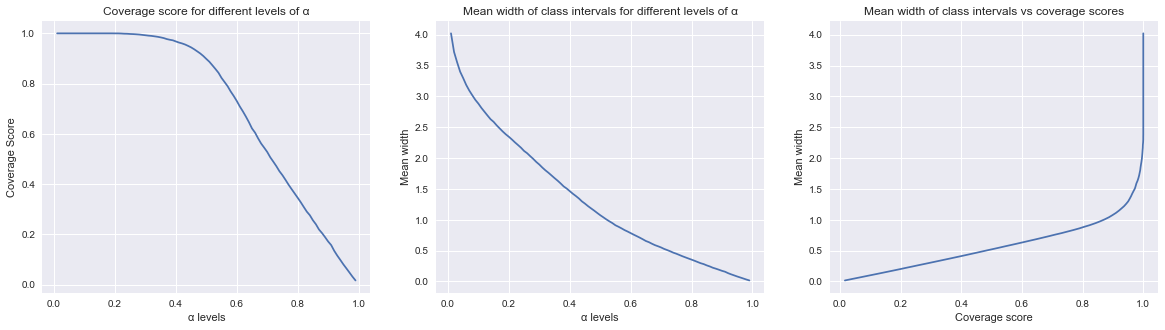

In [7]:
x = [i for i in np.arange(0.01, 1, 0.01)]

y = []

for i in np.arange(0.01,1,0.01):
    _, y_pi_mapie = mapie.predict(X_test, alpha=i)
    coverage = classification_coverage_score(_,y_pi_mapie[:, :, 0])
    y.append(coverage)

z = []

for i in np.arange(0.01,1,0.01):
    _, y_pi_mapie = mapie.predict(X_test, alpha=i)
    mean_width = classification_mean_width_score(y_pi_mapie[:, :, 0])
    z.append(mean_width)


plt.figure(figsize=(20,5))

# For Coverage score for different levels of α
plt.subplot(1,3,1)
plt.title('Coverage score for different levels of α')
plt.plot(x, y)
plt.ylabel('Coverage Score')
plt.xlabel('α levels')

# For Mean width of class intervals for different levels of α
plt.subplot(1,3,2)
plt.title('Mean width of class intervals for different levels of α')
plt.plot(x, z)
plt.ylabel('Mean width')
plt.xlabel('α levels')

# For Mean width of class intervals vs coverage scores
plt.subplot(1,3,3)
plt.title('Mean width of class intervals vs coverage scores')
plt.plot(y, z)
plt.ylabel('Mean width')
plt.xlabel('Coverage score')
plt.show()

### Gaussian Naive Bayes

In [8]:
gnb = GaussianNB().fit(X_train, y_train)
mapie = MapieClassifier(estimator=gnb).fit(X_cal, y_cal)

In [9]:
alpha_levels = [0.1, 0.25, 0.4]
for alpha in alpha_levels:
    print("-----------------------------------------------------------")
    _, y_pi_mapie = mapie.predict(X_test, alpha=alpha)
    print("Effective Coverage Score at {}: {}".format(alpha, classification_coverage_score(_,y_pi_mapie[:, :, 0])))
    print("Mean Width of intervals at {}: {}".format(alpha, classification_mean_width_score(y_pi_mapie[:, :, 0])))
    print("-----------------------------------------------------------")

-----------------------------------------------------------
Effective Coverage Score at 0.1: 1.0
Mean Width of intervals at 0.1: 3.0318357418800974
-----------------------------------------------------------
-----------------------------------------------------------
Effective Coverage Score at 0.25: 1.0
Mean Width of intervals at 0.25: 2.2995421376448704
-----------------------------------------------------------
-----------------------------------------------------------
Effective Coverage Score at 0.4: 1.0
Mean Width of intervals at 0.4: 1.6184003433967664
-----------------------------------------------------------


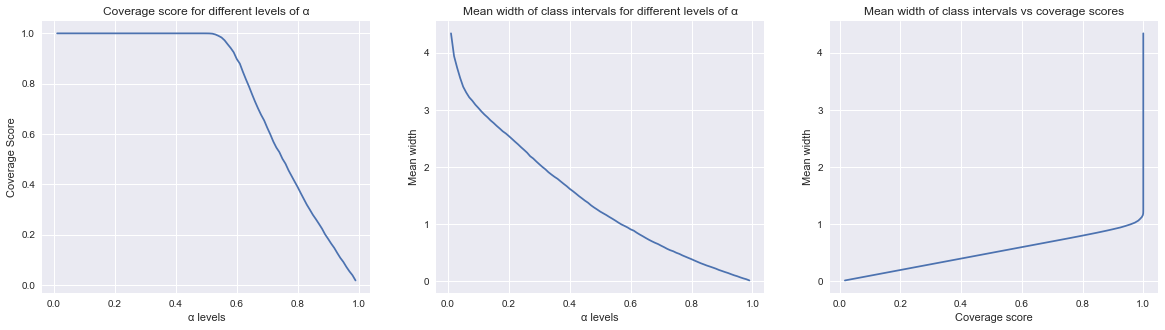

In [10]:
x = [i for i in np.arange(0.01, 1, 0.01)]

y = []

for i in np.arange(0.01,1,0.01):
    _, y_pi_mapie = mapie.predict(X_test, alpha=i)
    coverage = classification_coverage_score(_,y_pi_mapie[:, :, 0])
    y.append(coverage)

z = []

for i in np.arange(0.01,1,0.01):
    _, y_pi_mapie = mapie.predict(X_test, alpha=i)
    mean_width = classification_mean_width_score(y_pi_mapie[:, :, 0])
    z.append(mean_width)


plt.figure(figsize=(20,5))

# For Coverage score for different levels of α
plt.subplot(1,3,1)
plt.title('Coverage score for different levels of α')
plt.plot(x, y)
plt.ylabel('Coverage Score')
plt.xlabel('α levels')

# For Mean width of class intervals for different levels of α
plt.subplot(1,3,2)
plt.title('Mean width of class intervals for different levels of α')
plt.plot(x, z)
plt.ylabel('Mean width')
plt.xlabel('α levels')

# For Mean width of class intervals vs coverage scores
plt.subplot(1,3,3)
plt.title('Mean width of class intervals vs coverage scores')
plt.plot(y, z)
plt.ylabel('Mean width')
plt.xlabel('Coverage score')
plt.show()

### Decision Trees

In [11]:
DecTree = DecisionTreeClassifier(max_depth = 5).fit(X_train, y_train)
mapie = MapieClassifier(estimator=DecTree).fit(X_cal, y_cal)

In [12]:
alpha_levels = [0.1, 0.25, 0.4]
for alpha in alpha_levels:
    print("-----------------------------------------------------------")
    _, y_pi_mapie = mapie.predict(X_test, alpha=alpha)
    print("Effective Coverage Score at {}: {}".format(alpha, classification_coverage_score(_,y_pi_mapie[:, :, 0])))
    print("Mean Width of intervals at {}: {}".format(alpha, classification_mean_width_score(y_pi_mapie[:, :, 0])))
    print("-----------------------------------------------------------")

-----------------------------------------------------------
Effective Coverage Score at 0.1: 0.9994276720560882
Mean Width of intervals at 0.1: 2.922306481613965
-----------------------------------------------------------
-----------------------------------------------------------
Effective Coverage Score at 0.25: 0.9788238660752612
Mean Width of intervals at 0.25: 1.9539991415080842
-----------------------------------------------------------
-----------------------------------------------------------
Effective Coverage Score at 0.4: 0.9641579625125197
Mean Width of intervals at 0.4: 1.4431249105737587
-----------------------------------------------------------


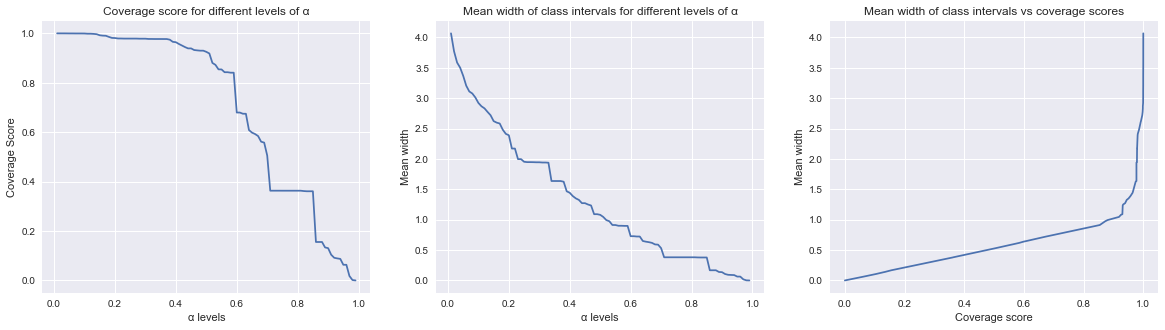

In [13]:
x = [i for i in np.arange(0.01, 1, 0.01)]

y = []

for i in np.arange(0.01,1,0.01):
    _, y_pi_mapie = mapie.predict(X_test, alpha=i)
    coverage = classification_coverage_score(_,y_pi_mapie[:, :, 0])
    y.append(coverage)

z = []

for i in np.arange(0.01,1,0.01):
    _, y_pi_mapie = mapie.predict(X_test, alpha=i)
    mean_width = classification_mean_width_score(y_pi_mapie[:, :, 0])
    z.append(mean_width)


plt.figure(figsize=(20,5))

# For Coverage score for different levels of α
plt.subplot(1,3,1)
plt.title('Coverage score for different levels of α')
plt.plot(x, y)
plt.ylabel('Coverage Score')
plt.xlabel('α levels')

# For Mean width of class intervals for different levels of α
plt.subplot(1,3,2)
plt.title('Mean width of class intervals for different levels of α')
plt.plot(x, z)
plt.ylabel('Mean width')
plt.xlabel('α levels')

# For Mean width of class intervals vs coverage scores
plt.subplot(1,3,3)
plt.title('Mean width of class intervals vs coverage scores')
plt.plot(y, z)
plt.ylabel('Mean width')
plt.xlabel('Coverage score')
plt.show()

### K-Nearest Neighbors

In [14]:
knn = KNeighborsClassifier(n_neighbors = 4).fit(X_train, y_train)
mapie = MapieClassifier(estimator=knn).fit(X_cal, y_cal)

In [15]:
alpha_levels = [0.1, 0.25, 0.4]
for alpha in alpha_levels:
    print("-----------------------------------------------------------")
    _, y_pi_mapie = mapie.predict(X_test, alpha=alpha)
    print("Effective Coverage Score at {}: {}".format(alpha, classification_coverage_score(_,y_pi_mapie[:, :, 0])))
    print("Mean Width of intervals at {}: {}".format(alpha, classification_mean_width_score(y_pi_mapie[:, :, 0])))
    print("-----------------------------------------------------------")

-----------------------------------------------------------
Effective Coverage Score at 0.1: 1.0
Mean Width of intervals at 0.1: 5.0
-----------------------------------------------------------
-----------------------------------------------------------
Effective Coverage Score at 0.25: 0.9901273429675204
Mean Width of intervals at 0.25: 1.6556732007440262
-----------------------------------------------------------
-----------------------------------------------------------
Effective Coverage Score at 0.4: 0.9901273429675204
Mean Width of intervals at 0.4: 1.6556732007440262
-----------------------------------------------------------


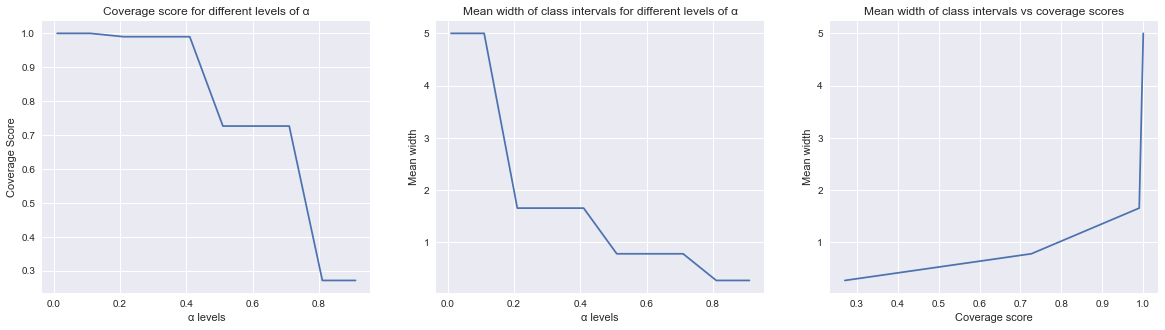

In [16]:
# For algorithms that take long times to train, I have taken increments of 0.1 instead of 0.01.
# Otherwise takes way too long to train.

x = [i for i in np.arange(0.01, 1, 0.1)]

y = []

for i in np.arange(0.01,1,0.1):
    _, y_pi_mapie = mapie.predict(X_test, alpha=i)
    coverage = classification_coverage_score(_,y_pi_mapie[:, :, 0])
    y.append(coverage)

z = []

for i in np.arange(0.01,1,0.1):
    _, y_pi_mapie = mapie.predict(X_test, alpha=i)
    mean_width = classification_mean_width_score(y_pi_mapie[:, :, 0])
    z.append(mean_width)


plt.figure(figsize=(20,5))

# For Coverage score for different levels of α
plt.subplot(1,3,1)
plt.title('Coverage score for different levels of α')
plt.plot(x, y)
plt.ylabel('Coverage Score')
plt.xlabel('α levels')

# For Mean width of class intervals for different levels of α
plt.subplot(1,3,2)
plt.title('Mean width of class intervals for different levels of α')
plt.plot(x, z)
plt.ylabel('Mean width')
plt.xlabel('α levels')

# For Mean width of class intervals vs coverage scores
plt.subplot(1,3,3)
plt.title('Mean width of class intervals vs coverage scores')
plt.plot(y, z)
plt.ylabel('Mean width')
plt.xlabel('Coverage score')
plt.show()

### Support Vector Machines

In [17]:
SVM = SVC(kernel="poly", probability=True).fit(X_train, y_train)
mapie = MapieClassifier(estimator=SVM).fit(X_cal, y_cal)

In [18]:
alpha_levels = [0.1, 0.25, 0.4]
for alpha in alpha_levels:
    print("-----------------------------------------------------------")
    _, y_pi_mapie = mapie.predict(X_test, alpha=alpha)
    print("Effective Coverage Score at {}: {}".format(alpha, classification_coverage_score(_,y_pi_mapie[:, :, 0])))
    print("Mean Width of intervals at {}: {}".format(alpha, classification_mean_width_score(y_pi_mapie[:, :, 0])))
    print("-----------------------------------------------------------")

-----------------------------------------------------------
Effective Coverage Score at 0.1: 0.991701244813278
Mean Width of intervals at 0.1: 2.847259979968522
-----------------------------------------------------------
-----------------------------------------------------------
Effective Coverage Score at 0.25: 0.9831163256546
Mean Width of intervals at 0.25: 2.0968665045070827
-----------------------------------------------------------
-----------------------------------------------------------
Effective Coverage Score at 0.4: 0.9640148805265417
Mean Width of intervals at 0.4: 1.3792388038345973
-----------------------------------------------------------


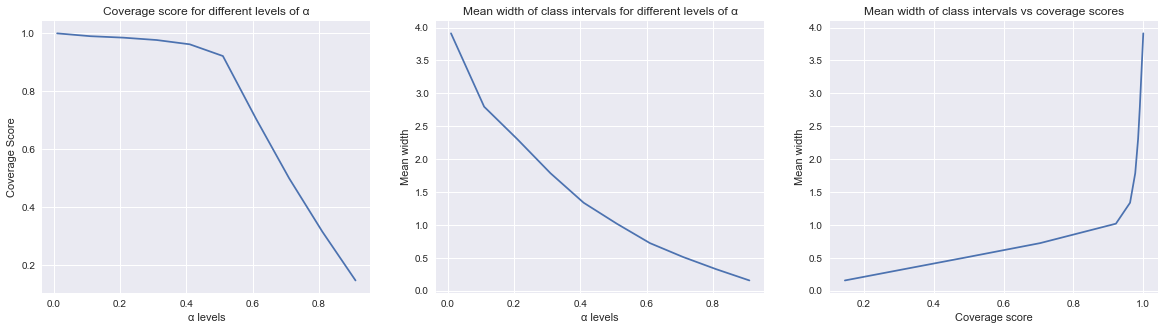

In [19]:
x = [i for i in np.arange(0.01, 1, 0.1)]

y = []

for i in np.arange(0.01,1,0.1):
    _, y_pi_mapie = mapie.predict(X_test, alpha=i)
    coverage = classification_coverage_score(_,y_pi_mapie[:, :, 0])
    y.append(coverage)

z = []

for i in np.arange(0.01,1,0.1):
    _, y_pi_mapie = mapie.predict(X_test, alpha=i)
    mean_width = classification_mean_width_score(y_pi_mapie[:, :, 0])
    z.append(mean_width)


plt.figure(figsize=(20,5))

# For Coverage score for different levels of α
plt.subplot(1,3,1)
plt.title('Coverage score for different levels of α')
plt.plot(x, y)
plt.ylabel('Coverage Score')
plt.xlabel('α levels')

# For Mean width of class intervals for different levels of α
plt.subplot(1,3,2)
plt.title('Mean width of class intervals for different levels of α')
plt.plot(x, z)
plt.ylabel('Mean width')
plt.xlabel('α levels')

# For Mean width of class intervals vs coverage scores
plt.subplot(1,3,3)
plt.title('Mean width of class intervals vs coverage scores')
plt.plot(y, z)
plt.ylabel('Mean width')
plt.xlabel('Coverage score')
plt.show()

### Random Forest Classifier

In [20]:
RFC = RandomForestClassifier().fit(X_train, y_train)
mapie = MapieClassifier(estimator=RFC).fit(X_cal, y_cal)

In [21]:
alpha_levels = [0.1, 0.25, 0.4]
for alpha in alpha_levels:
    print("-----------------------------------------------------------")
    _, y_pi_mapie = mapie.predict(X_test, alpha=alpha)
    print("Effective Coverage Score at {}: {}".format(alpha, classification_coverage_score(_,y_pi_mapie[:, :, 0])))
    print("Mean Width of intervals at {}: {}".format(alpha, classification_mean_width_score(y_pi_mapie[:, :, 0])))
    print("-----------------------------------------------------------")

-----------------------------------------------------------
Effective Coverage Score at 0.1: 1.0
Mean Width of intervals at 0.1: 2.5688224352554014
-----------------------------------------------------------
-----------------------------------------------------------
Effective Coverage Score at 0.25: 0.9884103591357848
Mean Width of intervals at 0.25: 1.6135355558735156
-----------------------------------------------------------
-----------------------------------------------------------
Effective Coverage Score at 0.4: 0.8988410359135784
Mean Width of intervals at 0.4: 1.0593790241808556
-----------------------------------------------------------


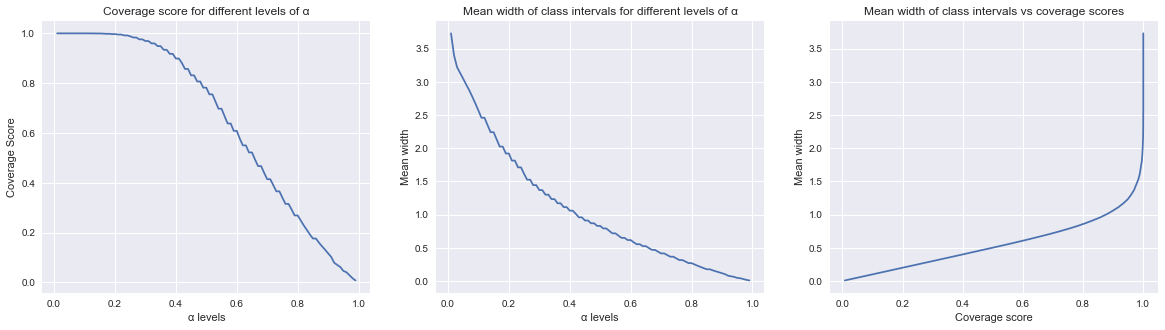

In [22]:
x = [i for i in np.arange(0.01, 1, 0.01)]

y = []

for i in np.arange(0.01,1,0.01):
    _, y_pi_mapie = mapie.predict(X_test, alpha=i)
    coverage = classification_coverage_score(_,y_pi_mapie[:, :, 0])
    y.append(coverage)

z = []

for i in np.arange(0.01,1,0.01):
    _, y_pi_mapie = mapie.predict(X_test, alpha=i)
    mean_width = classification_mean_width_score(y_pi_mapie[:, :, 0])
    z.append(mean_width)


plt.figure(figsize=(20,5))

# For Coverage score for different levels of α
plt.subplot(1,3,1)
plt.title('Coverage score for different levels of α')
plt.plot(x, y)
plt.ylabel('Coverage Score')
plt.xlabel('α levels')

# For Mean width of class intervals for different levels of α
plt.subplot(1,3,2)
plt.title('Mean width of class intervals for different levels of α')
plt.plot(x, z)
plt.ylabel('Mean width')
plt.xlabel('α levels')

# For Mean width of class intervals vs coverage scores
plt.subplot(1,3,3)
plt.title('Mean width of class intervals vs coverage scores')
plt.plot(y, z)
plt.ylabel('Mean width')
plt.xlabel('Coverage score')
plt.show()

### XGBoost

In [23]:
XGBoost = GradientBoostingClassifier().fit(X_train, y_train)
mapie = MapieClassifier(estimator=XGBoost).fit(X_cal, y_cal)

In [24]:
alpha_levels = [0.1, 0.25, 0.4]
for alpha in alpha_levels:
    print("-----------------------------------------------------------")
    _, y_pi_mapie = mapie.predict(X_test, alpha=alpha)
    print("Effective Coverage Score at {}: {}".format(alpha, classification_coverage_score(_,y_pi_mapie[:, :, 0])))
    print("Mean Width of intervals at {}: {}".format(alpha, classification_mean_width_score(y_pi_mapie[:, :, 0])))
    print("-----------------------------------------------------------")

-----------------------------------------------------------
Effective Coverage Score at 0.1: 0.9997138360280441
Mean Width of intervals at 0.1: 2.690012877378738
-----------------------------------------------------------
-----------------------------------------------------------
Effective Coverage Score at 0.25: 0.9988553441121762
Mean Width of intervals at 0.25: 1.8949062812991844
-----------------------------------------------------------
-----------------------------------------------------------
Effective Coverage Score at 0.4: 0.9849048504793246
Mean Width of intervals at 0.4: 1.2549005580197452
-----------------------------------------------------------


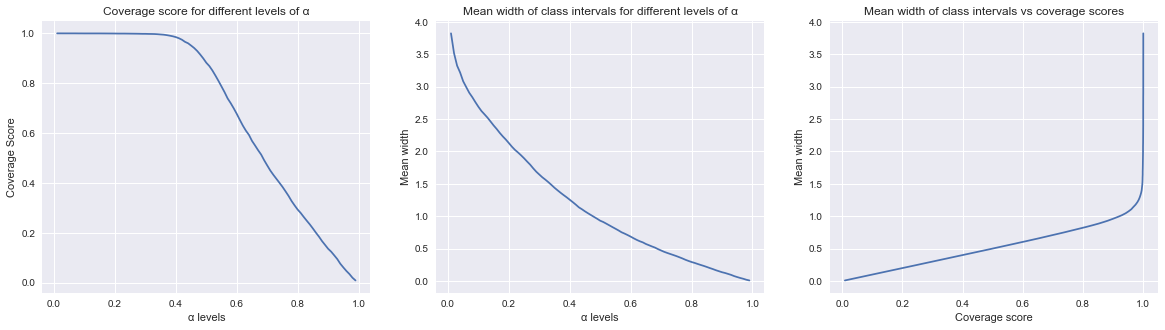

In [25]:
x = [i for i in np.arange(0.01, 1, 0.01)]

y = []

for i in np.arange(0.01,1,0.01):
    _, y_pi_mapie = mapie.predict(X_test, alpha=i)
    coverage = classification_coverage_score(_,y_pi_mapie[:, :, 0])
    y.append(coverage)

z = []

for i in np.arange(0.01,1,0.01):
    _, y_pi_mapie = mapie.predict(X_test, alpha=i)
    mean_width = classification_mean_width_score(y_pi_mapie[:, :, 0])
    z.append(mean_width)


plt.figure(figsize=(20,5))

# For Coverage score for different levels of α
plt.subplot(1,3,1)
plt.title('Coverage score for different levels of α')
plt.plot(x, y)
plt.ylabel('Coverage Score')
plt.xlabel('α levels')

# For Mean width of class intervals for different levels of α
plt.subplot(1,3,2)
plt.title('Mean width of class intervals for different levels of α')
plt.plot(x, z)
plt.ylabel('Mean width')
plt.xlabel('α levels')

# For Mean width of class intervals vs coverage scores
plt.subplot(1,3,3)
plt.title('Mean width of class intervals vs coverage scores')
plt.plot(y, z)
plt.ylabel('Mean width')
plt.xlabel('Coverage score')
plt.show()